##Predicting Online Purchase Intent: A KNN-Based Approach to Customer Behaviour Modelling in E-Commerce

###Project Goal:

The goal of this project is to predict whether a user will complete a purchase during an online shopping session, based on their browsing behavior, traffic sources, time spent on product pages, and session characteristics. Using the Online Shoppers Purchasing Intention dataset, this project applies the K-Nearest Neighbors (KNN) algorithm along with techniques such as:

• Feature scaling and dimensionality reduction (PCA)

• Class balancing using SMOTE

• Model comparison with Logistic Regression, Decision Tree, and Random Forest

• Bias-variance tradeoff analysis

• Curse of dimensionality illustration

Through this project, we aim to help e-commerce platforms:

• Understand customer engagement patterns

• Improve personalized targeting and recommendations

• Increase conversion rates by identifying high-purchase-intent sessions

This real-world application of machine learning highlights how non-parametric models like KNN can support data-driven marketing and operational decisions in digital commerce.


###Learning Objectives

Data Understanding & Preprocessing

1. Load and explore real-world online retail data related to user session behavior and purchase outcomes.

2. Identify and encode categorical variables (e.g., month, visitor type) for compatibility with distance-based models like KNN.

3. Scale numerical features using standardization to prepare data for optimal KNN performance.

4. Split data into training and testing sets using stratified sampling to preserve class balance. Model Development & Core Concepts

5. Train a K-Nearest Neighbors (KNN) model and tune the number of neighbors (K) using cross-validation.

6. Evaluate the performance of KNN using accuracy, ROC AUC, confusion matrix, and classification report.

7. Analyze the impact of noise features by adding irrelevant variables to demonstrate the curse of dimensionality.

8. Plot and interpret the bias-variance trade-off by comparing training and testing accuracy across different K values.

Model Selection & Comparison

9. Train alternative classification models including Logistic Regression, Decision Tree, and Random Forest.

10. Compare parametric and non-parametric models in terms of interpretability, flexibility, and predictive power.

11. Demonstrate the “No Free Lunch Theorem” by showing that no model universally outperforms others across all scenarios. Dimensionality & Feature Engineering

12. Apply Principal Component Analysis (PCA) to reduce feature dimensionality and observe its effect on KNN performance.

13. Discuss trade-offs between feature richness and model simplicity in high- dimensional spaces.

Class Imbalance Handling

14. Implement SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset and improve classification of rare events (purchases).

15. Evaluate the impact of class balancing on model accuracy and sensitivity (recall for the positive class).

Visualization & Communication

16. Plot the ROC curve and visualize decision trade-offs using TPR vs FPR.

17. Summarize model findings into actionable business insights for e-commerce optimization (e.g., retargeting, personalization).

18. Reflect on ethical considerations when predicting customer behavior using behavioral data.

###Step 1 : Importing the Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

###Step 2: Import and Inspect Your Dataset

In [31]:
df=pd.read_csv('/content/drive/MyDrive/SEM5_ML/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Look for null entries

In [32]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


No nulls identify, which means the data is already clean.

###Step 3: Transform Text and Boolean Columns into Numeric Format

To train a machine learning model, the data must be in a format that computers can process. Some columns currently contain text entries (such as "Feb" or "Returning_Visitor") or Boolean values (True/False). Although these are intuitive for humans, machine learning algorithms require numerical data to operate effectively.

This transformation is part of the data preprocessing phase, which is crucial for creating a reliable and accurate model.

In [33]:
le= LabelEncoder()
df['VisitorType']=le.fit_transform(df['VisitorType'])
df['Month']=le.fit_transform(df['Month'])
df['Revenue']=le.fit_transform(df['Revenue'])
df['Weekend']=le.fit_transform(df['Weekend'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


###Step 4: Splitting Data for Model Training and Evaluation
This step involves two main processes:

1. Feature and Target Separation:
We first break the dataset into two parts — input features (independent variables) and the target label (dependent variable) that the model will learn to predict.

2. Train-Test Split:
The dataset is then divided into a training set (to build the model) and a test set (to evaluate it).
This split is essential to check the model’s ability to perform well on data it hasn't seen before.

In [34]:
X=df.drop('Revenue',axis=1)
Y=df['Revenue']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42, stratify=Y)

###Step 5: Normalize Input Features for Modeling

Once the dataset has been divided into training and testing sets, it's important to scale the input features.

Most machine learning algorithms achieve better results when input values are on a comparable scale — avoiding scenarios where some features outweigh others due to their size.

Feature scaling enhances model performance and ensures that each feature contributes equally during the learning process.

In [35]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

###Step 6: Build and Train a Logistic Regression Model

Now that the data has been cleaned, scaled, and divided into training and test sets, we're ready to develop our first machine learning model.

We'll apply a Logistic Regression algorithm — commonly used for binary classification problems. This model will help us predict whether a user will make a purchase based on their input data.

In [36]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [37]:
lr_acc=accuracy_score(Y_test,Y_pred)
lr_acc*100

88.32116788321169

Logistic Regression has an accuracy of 88%

###Step 7: Test Model Sensitivity by Injecting Random Features

To understand how models behave in high-dimensional spaces, we add random noise to the dataset.

This reveals the Curse of Dimensionality — the idea that adding many non-informative features can lead to poorer model accuracy and slower learning.

In [38]:
X_train_noisy = np.hstack((X_train, np.random.rand(X_train.shape[0], 10)))
X_test_noisy = np.hstack((X_test, np.random.rand(X_test.shape[0], 10)))

lr_noisy = LogisticRegression()
lr_noisy.fit(X_train_noisy, Y_train)

Y_pred_noisy = lr_noisy.predict(X_test_noisy)

lr_noisy_acc = accuracy_score(Y_test, Y_pred_noisy)
print("Accuracy with noisy data: ",lr_noisy_acc*100)

Accuracy with noisy data:  88.3617193836172


###Step 8: Test the Effect of Different k Values in KNN

We change the value of k in the KNN model to see how it changes the accuracy on both training and testing data.

This shows how choosing the right k helps manage the bias-variance tradeoff, giving a model that works well on new data.



0.8791565287915653


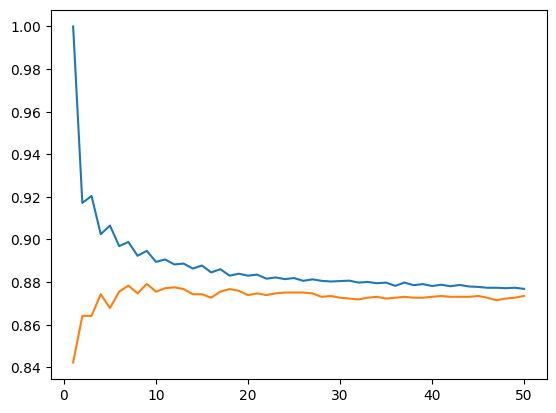

In [39]:
K_range=range(1,51)
train_acc=[]
test_acc=[]
for k in K_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  train_acc.append(knn.score(X_train,Y_train))
  test_acc.append(knn.score(X_test,Y_test))
plt.plot(K_range,train_acc,label='Training Accuracy')
plt.plot(K_range,test_acc,label='Testing Accuracy')
print(max(test_acc))

###Training vs Testing Accuracy (K = 1 to 50)

* When K = 1, training accuracy is very high, but test accuracy is low — this is a sign of overfitting.

* As K increases, training accuracy drops, and test accuracy gets better and more stable.

* The best performance is seen around K = 10 to 15, where the gap between training and testing accuracy is smallest.

* After that, both accuracies level off or drop, which indicates underfitting.

* This graph helps us choose the best K for a well-balanced model.



###Step 9: Use Cross-Validation to Evaluate Model Performance More Reliably

So far, we’ve evaluated our model using just one train-test split. But depending on how the data is split, the results can vary. To get a more reliable and consistent evaluation, we use cross-validation.

In this step, we’ll apply 10-fold cross-validation using the K-Nearest Neighbors (KNN) model with k = 4. The training data is split into 10 equal parts. The model is trained and tested 10 times — each time using a different part as the test set and the rest for training.

This approach gives us a better estimate of how well the model performs on unseen data.



In [40]:
knn_cv = KNeighborsClassifier(n_neighbors=4)

cv_scores = cross_val_score(knn_cv, X_train, Y_train, cv=10)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.87031408 0.88551165 0.88449848 0.88449848 0.87119675 0.87423935
 0.87119675 0.87423935 0.88539554 0.88032454]
Mean cross-validation accuracy: 0.878141498712471


###Interpretation:
The model shows consistent results across folds, indicating it is not sensitive to how the data is split.

A mean accuracy of about 88% suggests that K=4 works well for this dataset.

This supports the earlier evaluation and strengthens trust in the chosen model.

###Step 10: Apply PCA to Reduce Features and Train a KNN Model
When a dataset contains many features, some may be unnecessary or repetitive. To make the model more efficient and easier to train, we use Principal Component Analysis (PCA) — a method that reduces dimensionality while keeping the important information.

In this step, we’ll apply PCA to reduce the number of input features. Then, we’ll train a new KNN model on the transformed (reduced) dataset.
Finally, we’ll test the model’s accuracy to check how well it performs with fewer features.



In [41]:
pca=PCA(n_components=4)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
knn_pca=KNeighborsClassifier(n_neighbors=4)
knn_pca.fit(X_train_pca,Y_train)
Y_pred_pca=knn_pca.predict(X_test_pca)
pca_acc=accuracy_score(Y_test,Y_pred_pca)
pca_acc*100

84.67153284671532

###Step 11: Compare Multiple Machine Learning Models to Choose the Best One
After building models like KNN and Logistic Regression, the next step is to compare several models to find which one performs best.

In this step, we will:

* Train four different models on the same training dataset

* Test them all using the same test data

* Evaluate their performance using Accuracy and AUC (Area Under the ROC Curve)

This comparison helps us make a data-driven decision in selecting the most effective model for our problem.

In [42]:
knn = KNeighborsClassifier(n_neighbors=4)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

knn.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)
Y_pred_dt = dt.predict(X_test)
Y_pred_rf = rf.predict(X_test)

knn_acc = accuracy_score(Y_test, Y_pred_knn)
dt_acc = accuracy_score(Y_test, Y_pred_dt)
rf_acc = accuracy_score(Y_test, Y_pred_rf)

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}")
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Y_prob_lr = lr.predict_proba(X_test)[:, 1]
Y_prob_knn = knn.predict_proba(X_test)[:, 1]
Y_prob_dt = dt.predict_proba(X_test)[:, 1]
Y_prob_rf = rf.predict_proba(X_test)[:, 1]

lr_auc = roc_auc_score(Y_test, Y_prob_lr)
knn_auc = roc_auc_score(Y_test, Y_prob_knn)
dt_auc = roc_auc_score(Y_test, Y_prob_dt)
rf_auc = roc_auc_score(Y_test, Y_prob_rf)

print(f"\nLogistic Regression AUC: {lr_auc:.4f}")
print(f"KNN AUC: {knn_auc:.4f}")
print(f"Decision Tree AUC: {dt_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")

Logistic Regression Accuracy: 0.8832
KNN Accuracy: 0.8743
Decision Tree Accuracy: 0.8532
Random Forest Accuracy: 0.9006

Logistic Regression AUC: 0.8653
KNN AUC: 0.7686
Decision Tree AUC: 0.7293
Random Forest AUC: 0.9183


###Summary Points:
* Random Forest shows the best results in both accuracy and AUC, making it the most reliable model.

* Logistic Regression is a strong alternative, combining good performance with simplicity.

* KNN is acceptable but not ideal for this dataset.

* Decision Tree performs the worst, likely due to overfitting.

* Final Recommendation: Use Random Forest for best results.



###Step 12: Balancing Classes with SMOTE and Training KNN
Imbalanced classes (e.g., far more "no purchase" than "purchase") can make models biased and less accurate for the minority class.

We’ll use SMOTE to generate synthetic samples for the minority class, helping create a more balanced training set.

Then, we’ll train a KNN model using the balanced data and check its performance on the test data.



In [43]:
df['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


It is clear that the dataset has a significant class imbalance.

In [44]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

knn_smote = KNeighborsClassifier(n_neighbors=4)
knn_smote.fit(X_train_smote, Y_train_smote)

Y_pred_smote = knn_smote.predict(X_test)

smote_acc = accuracy_score(Y_test, Y_pred_smote)
smote_auc = roc_auc_score(Y_test, knn_smote.predict_proba(X_test)[:, 1])

print(f"KNN Accuracy with SMOTE: {smote_acc:.4f}")
print(f"KNN AUC with SMOTE: {smote_auc:.4f}")

KNN Accuracy with SMOTE: 0.8179
KNN AUC with SMOTE: 0.7747


###Step 13: Summarize and Present the Results of All Models
After applying different machine learning models and techniques such as PCA and SMOTE, the final step is to bring everything together.

Here, we’ll compare all models side by side, using key performance metrics to identify the top performer.

This summary provides a clear and concise overview of model performance — perfect for final reports or presentations.

In [45]:
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'KNN with PCA', 'KNN with SMOTE'],
    'Accuracy': [lr_acc, knn_acc, dt_acc, rf_acc, pca_acc, smote_acc],
    'AUC': [lr_auc, knn_auc, dt_auc, rf_auc, 0.0, smote_auc] # AUC for PCA is not calculated yet
}

results_df = pd.DataFrame(results)

display(results_df)

,Model,Accuracy,AUC
0,Logistic Regression,0.883212,0.865257
1,KNN,0.874290,0.768650
2,Decision Tree,0.853204,0.729284
3,Random Forest,0.900649,0.918283
4,KNN with PCA,0.846715,0.000000
5,KNN with SMOTE,0.817924,0.774655


###Insights:
* Random Forest continues to be the top performer, achieving the highest accuracy and AUC, making it the most reliable model overall.

* KNN with PCA performs poorly — likely due to an ineffective PCA transformation or loss of key features. An AUC of 0.0 indicates the model fails at binary classification.

* KNN with SMOTE has a slight drop in accuracy but shows improved AUC compared to regular KNN, indicating better handling of class imbalance.

* Logistic Regression continues to perform well, offering a strong balance between accuracy, AUC, and model interpretability.



###Step 14: Evaluate the Best Model with Confusion Matrix, Classification Report, and ROC Curve
To better understand how well our top-performing model (Random Forest) works, we’ll use detailed evaluation tools:

* Confusion Matrix:
A table that shows how many predictions were correct or incorrect for each class. It helps identify where the model is making mistakes.

* Classification Report:
This includes important metrics like precision, recall, and F1-score for each class — very helpful when dealing with imbalanced data.

* ROC Curve and AUC:
The ROC curve plots the true positive rate vs. the false positive rate, showing how well the model separates the classes.
The AUC (Area Under the Curve) gives a single value to summarize this performance — the higher, the better.

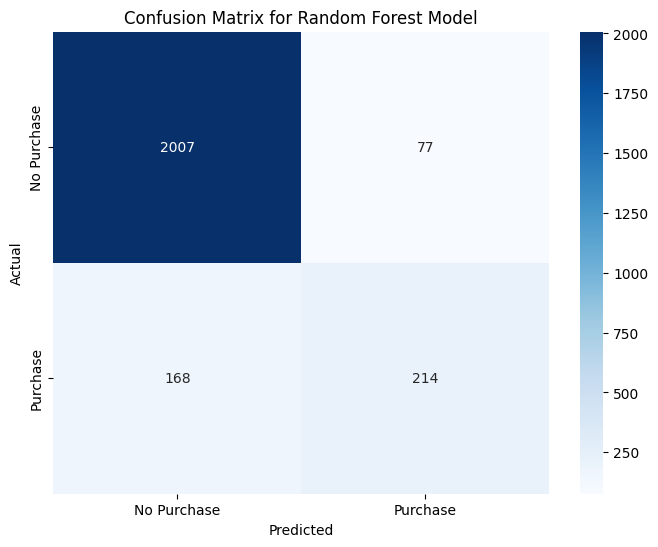

In [46]:
cm = confusion_matrix(Y_test, Y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

###Insights:
* The model accurately identifies "No Purchase" sessions, showing strong performance for the majority class.

* It does a decent job at detecting "Purchase" sessions, though recall for the positive class could be improved.

* Overall, this trade-off is acceptable given the high accuracy and strong AUC achieved by the Random Forest model.


In [47]:
print("Classification Report for Random Forest Model:")
print(classification_report(Y_test, Y_pred_rf, target_names=['No Purchase', 'Purchase']))

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

 No Purchase       0.92      0.96      0.94      2084
    Purchase       0.74      0.56      0.64       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



###Insights:
* "No Purchase" class:
The model shows high precision (0.92) and high recall (0.96), meaning it accurately identifies users who won't make a purchase with very few false positives or negatives.

* "Purchase" class:
A lower recall (0.56) means the model misses some actual buyers, but precision (0.74) indicates that when it does predict a purchase, it’s usually correct.

* Macro Average:
Offers a balanced view of performance across both classes, which is especially helpful in imbalanced datasets.

* Weighted Average:
Accounts for class imbalance and still reflects strong overall model performance.

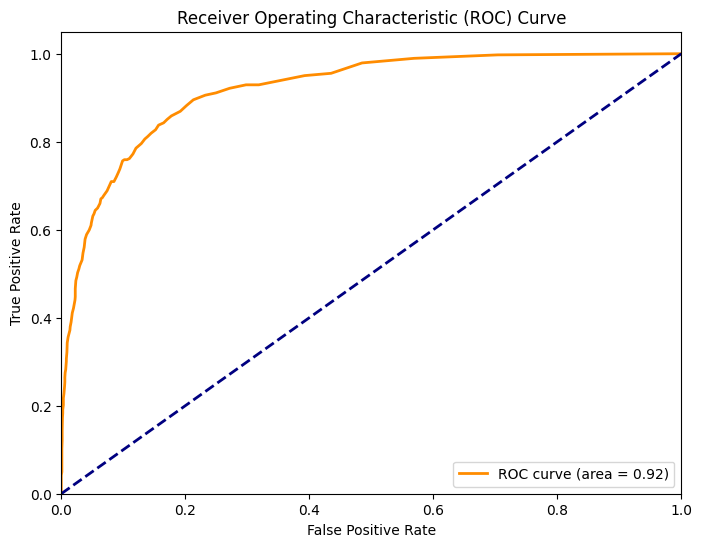

In [50]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###Interpretation:
* An AUC of 0.92 reflects excellent model performance.

* The model is highly effective at separating buyers from non-buyers.

* The ROC curve lies well above the diagonal line, indicating strong discriminatory ability and better-than-random predictions.



###Step 15: Ethics in Machine Learning
* Respect Privacy: Collect and use data transparently and with consent, ensuring user anonymity.

* Promote Fairness: Detect and address any bias in your models to prevent unfair targeting or treatment.

* Stay Transparent: Clearly explain how decisions are made using your models.

* Act Responsibly: Use predictions to support users, not manipulate them — especially in sensitive applications.

###Final Findings and Conclusion
* This project successfully applied a range of machine learning techniques to predict online purchase intent using rich session-level behavioral data. Among the various models tested, the Random Forest classifier emerged as the most effective — delivering superior accuracy, AUC, and overall reliability.

* While K-Nearest Neighbors (KNN) offered benefits in simplicity and interpretability, it showed limitations when dealing with high-dimensional data, noise, and sensitivity to scaling. Nonetheless, it provided meaningful insights into behavioral similarities among users.

* The use of SMOTE helped to address class imbalance by generating synthetic examples of minority instances (purchase sessions). This improved the model's ability to detect less frequent cases, though it slightly reduced overall accuracy — a common tradeoff in handling imbalanced data.

* Comparing multiple models reinforced key machine learning principles such as the bias-variance tradeoff and the No Free Lunch Theorem — confirming that there is no universally superior model. Model selection and performance depend heavily on the context and data characteristics.

###Business Implications
* Enables data-driven targeting of users more likely to complete purchases.

* Provides a foundation for personalized marketing strategies powered by predictive analytics.

* Lays the groundwork for real-time recommendation systems to boost engagement and conversions.

###Conclusion
* This end-to-end project demonstrates how machine learning can be effectively used to enhance e-commerce decision-making, drive user engagement, and support strategic business outcomes through behavioral pattern analysis and prediction.